Analyze historical cryptocurrency data to:

Study price movement and volatility

Compare different crypto assets using their tickers

Find correlations between tickers (BTC vs ETH, etc.)

Generate trading insights (top gainer, most volatile, etc.)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data
df = pd.read_csv('Crypto_historical_data.csv')

In [4]:
df.head(20)

,Date,Open,High,Low,Close,Volume,ticker,name
0,2017-11-09 00:00:00+00:00,0.001207,0.001415,0.001181,0.001415,6259550,DOGE-USD,Dogecoin
1,2017-11-10 00:00:00+00:00,0.001421,0.001431,0.001125,0.001163,4246520,DOGE-USD,Dogecoin
2,2017-11-11 00:00:00+00:00,0.001146,0.001257,0.001141,0.001201,2231080,DOGE-USD,Dogecoin
3,2017-11-12 00:00:00+00:00,0.001189,0.001210,0.001002,0.001038,3288960,DOGE-USD,Dogecoin
4,2017-11-13 00:00:00+00:00,0.001046,0.001212,0.001019,0.001211,2481270,DOGE-USD,Dogecoin
5,2017-11-14 00:00:00+00:00,0.001201,0.001239,0.001131,0.001184,2660340,DOGE-USD,Dogecoin
6,2017-11-15 00:00:00+00:00,0.001189,0.001351,0.001179,0.001339,2840180,DOGE-USD,Dogecoin
7,2017-11-16 00:00:00+00:00,0.001348,0.001424,0.001286,0.001390,3423010,DOGE-USD,Dogecoin
8,2017-11-17 00:00:00+00:00,0.001381,0.001394,0.001274,0.001313,2787480,DOGE-USD,Dogecoin
9,2017-11-18 00:00:00+00:00,0.001308,0.001385,0.001254,0.001373,1648260,DOGE-USD,Dogecoin


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343372 entries, 0 to 343371
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    343372 non-null  object 
 1   Open    342038 non-null  float64
 2   High    342038 non-null  float64
 3   Low     342038 non-null  float64
 4   Close   343372 non-null  float64
 5   Volume  343372 non-null  int64  
 6   ticker  343372 non-null  object 
 7   name    343372 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.0+ MB


need to change the dType of the respective columns 

In [6]:
# Changing the column names to snake case
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [7]:
df['date'] = pd.to_datetime(df['date'])

Changing the dtype here

In [8]:
num_cols = ['open', 'high', 'low', 'close', 'volume']
for col in num_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", "")     # remove commas
        .str.replace(" ", "")     # remove spaces
        .astype(float)
    )

In [9]:
# Filling the null values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [10]:
df.describe()

,open,high,low,close,volume
count,343372.000000,3.433720e+05,343372.000000,343372.000000,3.433720e+05
mean,1627.493745,1.662118e+03,1594.306130,1628.978234,2.544195e+09
std,9648.592715,9.829057e+03,9481.180741,9657.133285,2.754030e+11
min,0.000000,7.750470e-13,-1.217554,0.000000,0.000000e+00
25%,0.138528,1.467922e-01,0.130455,0.129235,8.905060e+05
50%,1.123912,1.167615e+00,1.079258,1.105487,2.491709e+07
75%,40.133010,4.191164e+01,38.359093,40.136135,2.113788e+08
max,124827.132812,2.364932e+05,123230.890625,124828.453125,8.325207e+13


In [11]:
df.describe(include='all')

,date,open,high,low,close,volume,ticker,name
count,343372,343372.000000,3.433720e+05,343372.000000,343372.000000,3.433720e+05,343372,343372
unique,NaN,NaN,NaN,NaN,NaN,NaN,214,226
top,NaN,NaN,NaN,NaN,NaN,NaN,WETH-USD,Litecoin
freq,NaN,NaN,NaN,NaN,NaN,NaN,17094,4065
mean,2022-09-22 12:02:21.663269376+00:00,1627.493745,1.662118e+03,1594.306130,1628.978234,2.544195e+09,NaN,NaN
min,2014-09-17 00:00:00+00:00,0.000000,7.750470e-13,-1.217554,0.000000,0.000000e+00,NaN,NaN
25%,2021-03-29 00:00:00+00:00,0.138528,1.467922e-01,0.130455,0.129235,8.905060e+05,NaN,NaN
50%,2023-01-03 00:00:00+00:00,1.123912,1.167615e+00,1.079258,1.105487,2.491709e+07,NaN,NaN
75%,2024-07-08 00:00:00+00:00,40.133010,4.191164e+01,38.359093,40.136135,2.113788e+08,NaN,NaN
max,2025-11-03 00:00:00+00:00,124827.132812,2.364932e+05,123230.890625,124828.453125,8.325207e+13,NaN,NaN


In [12]:
# Removing rows where prices are zero or negative
df = df[(df['open'] > 0) & (df['high'] > 0) & (df['low'] > 0) & (df['close'] > 0)]

In [13]:
# Remove rows where volume is negative
df = df[df['volume'] >= 0]

Now checking for the null values

In [14]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
ticker    0
name      0
dtype: int64

In [15]:
df.head(20)

,date,open,high,low,close,volume,ticker,name
0,2017-11-09 00:00:00+00:00,0.001207,0.001415,0.001181,0.001415,6259550.0,DOGE-USD,Dogecoin
1,2017-11-10 00:00:00+00:00,0.001421,0.001431,0.001125,0.001163,4246520.0,DOGE-USD,Dogecoin
2,2017-11-11 00:00:00+00:00,0.001146,0.001257,0.001141,0.001201,2231080.0,DOGE-USD,Dogecoin
3,2017-11-12 00:00:00+00:00,0.001189,0.001210,0.001002,0.001038,3288960.0,DOGE-USD,Dogecoin
4,2017-11-13 00:00:00+00:00,0.001046,0.001212,0.001019,0.001211,2481270.0,DOGE-USD,Dogecoin
5,2017-11-14 00:00:00+00:00,0.001201,0.001239,0.001131,0.001184,2660340.0,DOGE-USD,Dogecoin
6,2017-11-15 00:00:00+00:00,0.001189,0.001351,0.001179,0.001339,2840180.0,DOGE-USD,Dogecoin
7,2017-11-16 00:00:00+00:00,0.001348,0.001424,0.001286,0.001390,3423010.0,DOGE-USD,Dogecoin
8,2017-11-17 00:00:00+00:00,0.001381,0.001394,0.001274,0.001313,2787480.0,DOGE-USD,Dogecoin
9,2017-11-18 00:00:00+00:00,0.001308,0.001385,0.001254,0.001373,1648260.0,DOGE-USD,Dogecoin


In [16]:
# Resetting the index
df.reset_index(drop=True, inplace=True)

In [17]:
from sqlalchemy import create_engine

# MySQL connection
username = "root"
password = "12345"
host = "localhost"
port = "3306"
database = "crypto"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")
# Write DataFrame to MySQL
table_name = "crypto_data" # choose any table name
df.to_sql(table_name, engine, if_exists="replace", index=False)

# Read back sample
pd.read_sql("SELECT * FROM crypto_data LIMIT 5;", engine)

,date,open,high,low,close,volume,ticker,name
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550.0,DOGE-USD,Dogecoin
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520.0,DOGE-USD,Dogecoin
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080.0,DOGE-USD,Dogecoin
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960.0,DOGE-USD,Dogecoin
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270.0,DOGE-USD,Dogecoin


In [18]:
# Top 5 tickers as per dataset
top5 = df['ticker'].value_counts().head(5)
print(top5)


major = top5.index.tolist()
print("Major tickers:", major)

ticker
WETH-USD    17082
DOGE-USD     5832
USDT-USD     5832
USDC-USD     5166
WBTC-USD     4938
Name: count, dtype: int64
Major tickers: ['WETH-USD', 'DOGE-USD', 'USDT-USD', 'USDC-USD', 'WBTC-USD']


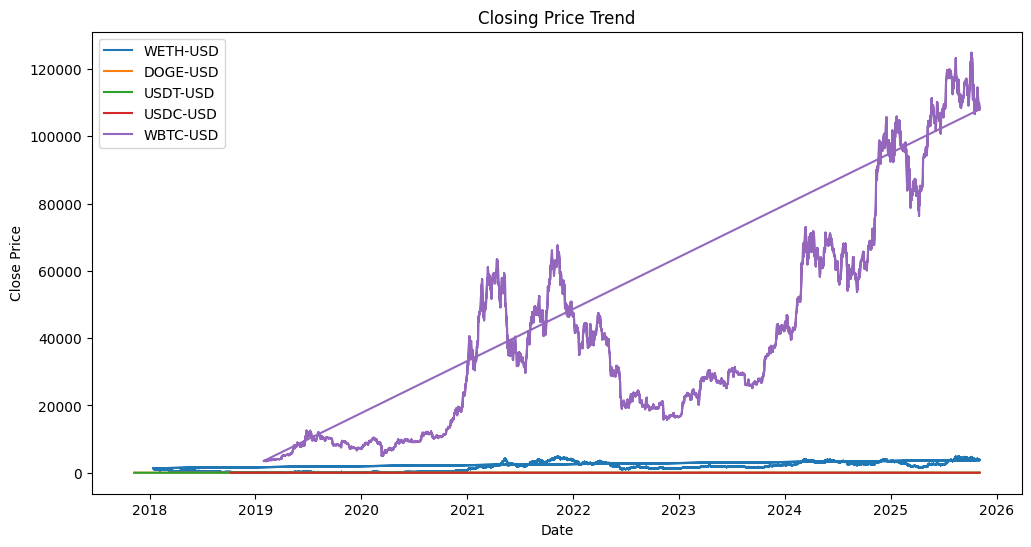

In [19]:
# 1. PRICE MOVEMENT (CLOSE PRICE) FOR Few TICKER

df_major = df[df['ticker'].isin(major)]
plt.figure(figsize=(12,6))
for t in major:
    subset = df_major[df_major['ticker'] == t]
    plt.plot(subset['date'], subset['close'], label=t)

plt.title("Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

WBTC has shown the maximum amount of closing price boost

C:\Users\yashw\AppData\Local\Temp\ipykernel_19488\1986073353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_major['returns'] = df_major.groupby('ticker')['close'].pct_change()


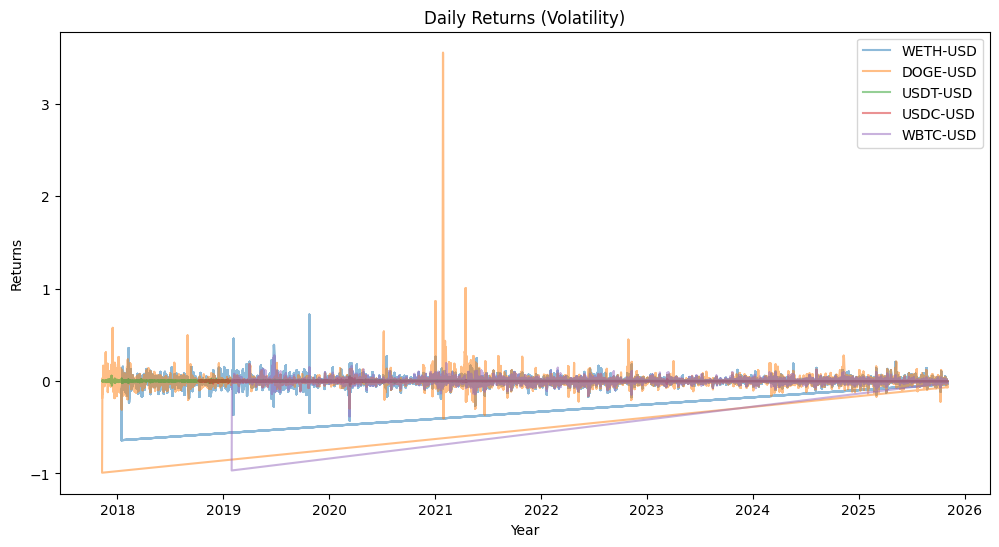

In [20]:
# 2. DAILY RETURNS VOLATILITY
df_major['returns'] = df_major.groupby('ticker')['close'].pct_change()

plt.figure(figsize=(12,6))
for t in major:
    subset = df_major[df_major['ticker'] == t]
    plt.plot(subset['date'], subset['returns'], alpha=0.5, label=t)

plt.title("Daily Returns (Volatility)")
plt.xlabel("Year")
plt.ylabel("Returns")
plt.legend()
plt.show()

Doge Coin have significantly more volatility then a=other coins making it little risky but also high profitable.

C:\Users\yashw\AppData\Local\Temp\ipykernel_19488\3817996367.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_gain.index, y=df_gain.values,palette='deep')


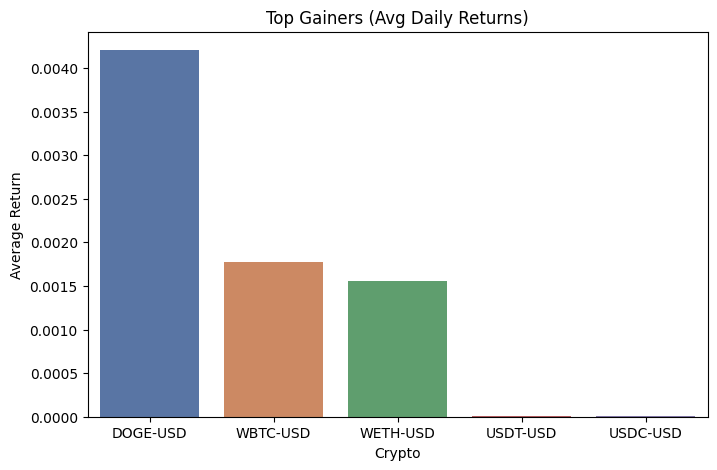

In [29]:
# Top gainer in 24hours

df_gain = df_major.groupby('ticker')['returns'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=df_gain.index, y=df_gain.values,palette='deep')
plt.title("Top Gainers (Avg Daily Returns)")
plt.ylabel("Average Return")
plt.xlabel("Crypto")
plt.show()

Doge coin is excelling the top gainers as the daily average is more.

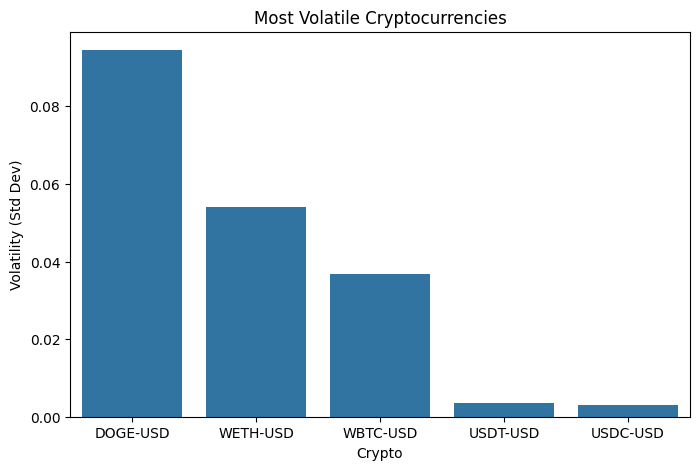

In [22]:
# Most Voletile crypto currency
df_vol = df_major.groupby('ticker')['returns'].std().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=df_vol.index, y=df_vol.values)
plt.title("Most Volatile Cryptocurrencies")
plt.ylabel("Volatility (Std Dev)")
plt.xlabel("Crypto")
plt.show()

Doge coin is almost 30% more voletile then the WETH coin

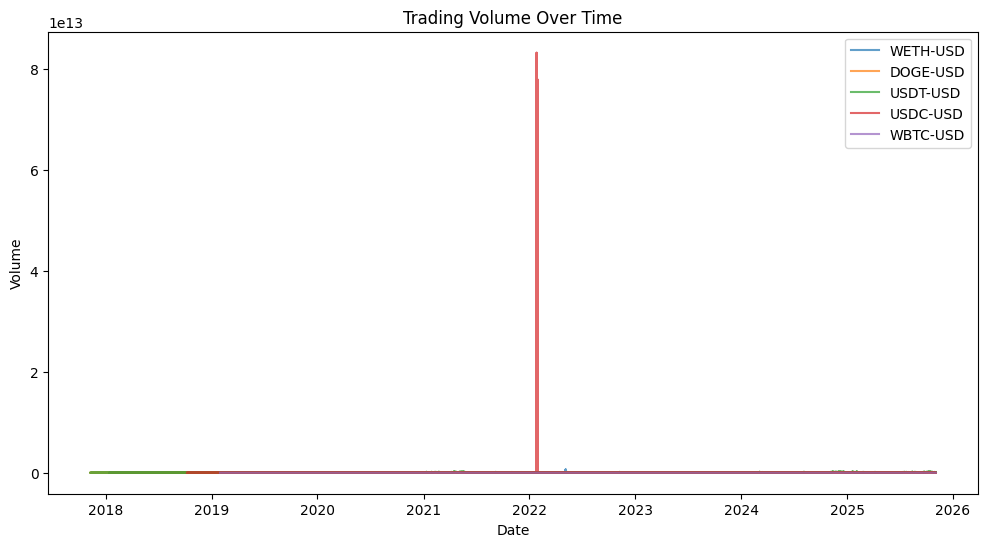

In [23]:
#6. Volume Traded Over Time 
plt.figure(figsize=(12,6))

for t in major:
    d = df_major[df_major['ticker'] == t]
    plt.plot(d['date'], d['volume'], label=t, alpha=0.7)

plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()


C:\Users\yashw\AppData\Local\Temp\ipykernel_19488\3551714132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_major['rolling_vol'] = df_major.groupby('ticker')['returns'].transform(lambda x: x.rolling(30).std())


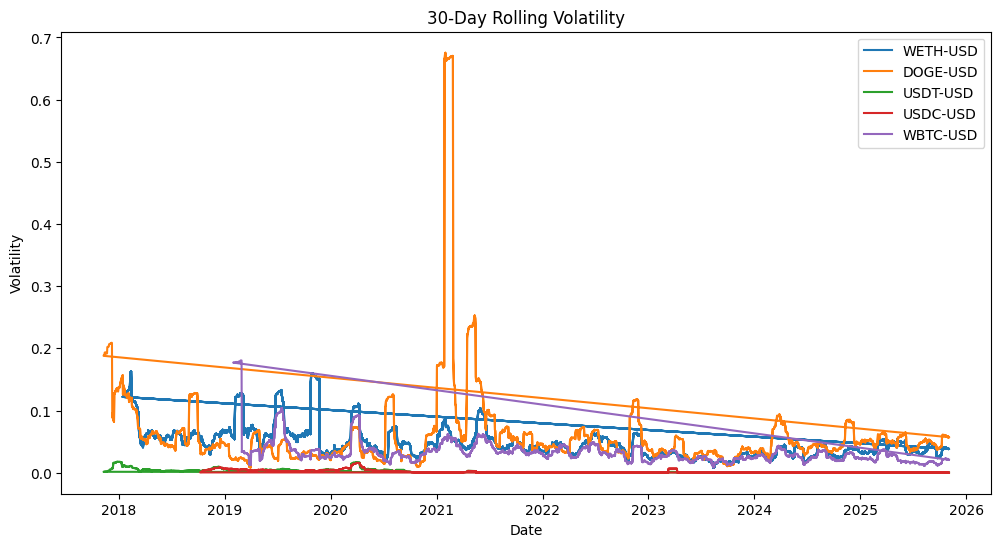

In [24]:
# 7. Rolling Volatility (30-day rolling STD of returns)
df_major['rolling_vol'] = df_major.groupby('ticker')['returns'].transform(lambda x: x.rolling(30).std())

plt.figure(figsize=(12,6))
for t in major:
    d = df_major[df_major['ticker'] == t]
    plt.plot(d['date'], d['rolling_vol'], label=t)

plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

In 30 day time period doge still showing more voletility

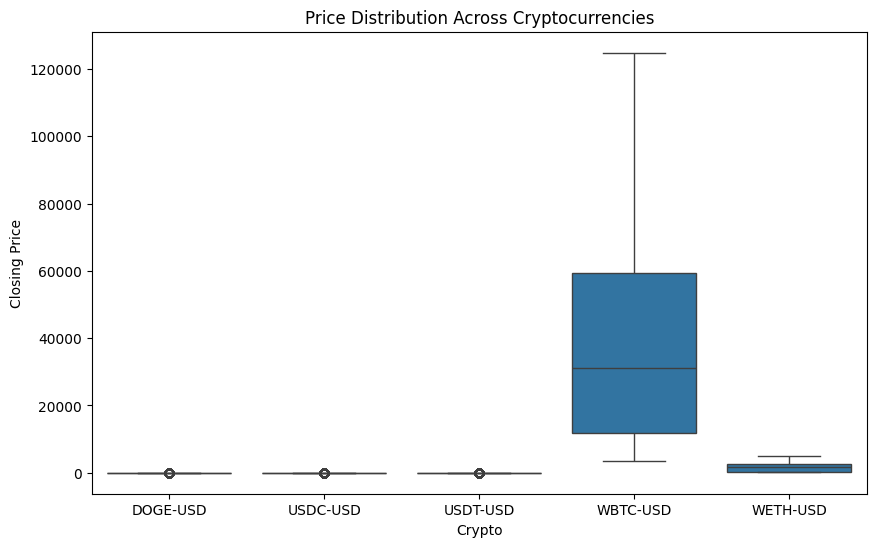

In [25]:
# 8.Boxplot of Closing Prices
plt.figure(figsize=(10,6))
sns.boxplot(data=df_major, x='ticker', y='close')
plt.title("Price Distribution Across Cryptocurrencies")
plt.xlabel("Crypto")
plt.ylabel("Closing Price")
plt.show()


WBTC is showing most price distribution

C:\Users\yashw\AppData\Local\Temp\ipykernel_19488\1259718192.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_major['month'] = df_major['date'].dt.to_period('M')
C:\Users\yashw\AppData\Local\Temp\ipykernel_19488\1259718192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_major['month'] = df_major['date'].dt.to_period('M')


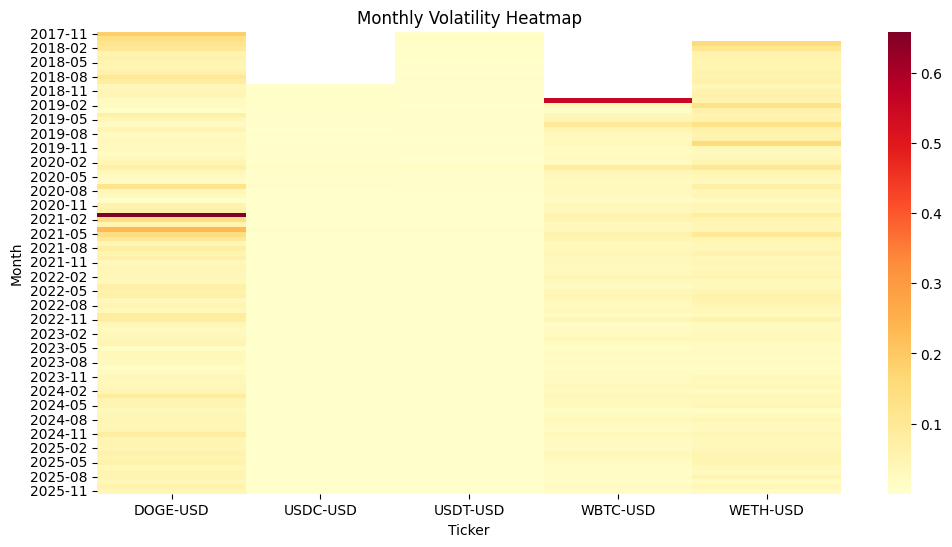

In [26]:
# 9.Heatmap of Volatility by Month & Ticker
df_major['month'] = df_major['date'].dt.to_period('M')
vol_matrix = df_major.groupby(['month','ticker'])['returns'].std().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(vol_matrix, cmap="YlOrRd")
plt.title("Monthly Volatility Heatmap")
plt.xlabel("Ticker")
plt.ylabel("Month")
plt.show()

Dogecoin is showing the most voletility followed by the WETC then WBTC.

Conslusion :-

1> 'WETH-USD', 'DOGE-USD', 'USDT-USD', 'USDC-USD', 'WBTC-USD' are the top coins from the dataset 
2> BItcoin price is the amoung all 
3> Dogecoin is showing most voletility, making it risky
4> WBTC is showing the most price distribution 